In [1]:
#importing libraries for dataframe and computation
import pandas as pd
import numpy as np
from scipy import stats

#importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing data modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#importing libraries for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#importing dataset
df=pd.read_csv('G:/DataAnalytics/Data/COVID_19_analysis_data.csv')
df.head()

,province_name,country,hdi,population_density,urban_pop,clean_water_access,health_expense,life_expectancy,infant_mortality,confirmed
0,Iceland,Iceland,0.935,3.543,342650,359679,1.623299e+09,82.200,1.600000,1802
1,Abruzzo,Italy,0.884,121.488,906015,1306906,3.707051e+09,82.393,3.003398,3178
2,Andalusia,Spain,0.862,96.418,6465226,8109662,1.881265e+10,79.588,2.799328,12420
3,Anhui,China,0.724,425.916,31598381,43113201,2.474495e+10,72.304,11.079683,991
4,Aragon,Spain,0.898,27.647,1056035,1324553,3.072875e+09,82.912,2.916237,5456


In [38]:
df.to_excel('G:/DataAnalytics/Data/COVID_19_analysis.xlsx')

In [3]:
df.shape

(94, 10)

In [4]:
from sklearn.model_selection import train_test_split

## Exploratory Analysis

(0, 89286.12337721071)

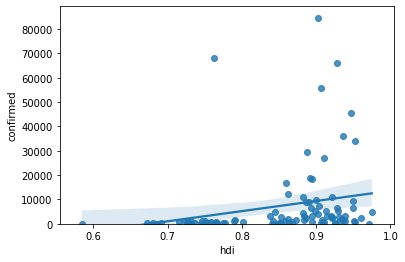

In [5]:
#hdi v/s confirmed

sns.regplot(x='hdi',y='confirmed',data=df)
plt.ylim(0,)

(0, 89395.5951769122)

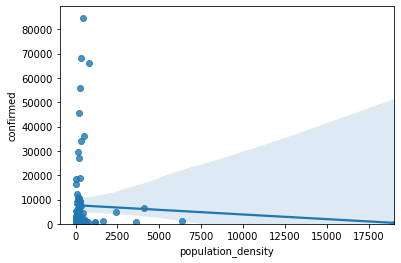

In [6]:
#population density v/s confirmed

sns.regplot(x='population_density',y='confirmed',data=df)
plt.ylim(0,)

(0, 88855.18075042182)

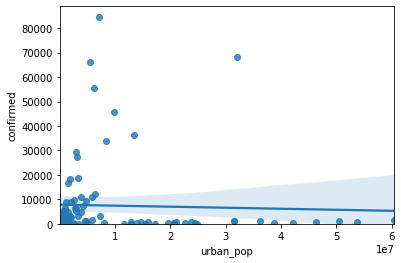

In [7]:
#urban population v/s confirmed

sns.regplot(x='urban_pop',y='confirmed',data=df)
plt.ylim(0,)

(0, 88848.11277147192)

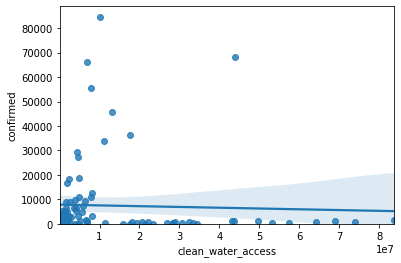

In [8]:
#Access of clean water v/s confirmed

sns.regplot(x='clean_water_access',y='confirmed',data=df)
plt.ylim(0,)

(0, 88757.23584536384)

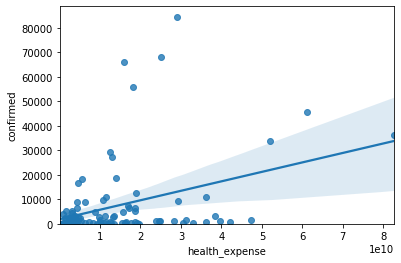

In [9]:
#Expenditure on health by state v/s confirmed

sns.regplot(x='health_expense',y='confirmed',data=df)
plt.ylim(0,)

(0, 89649.55989829886)

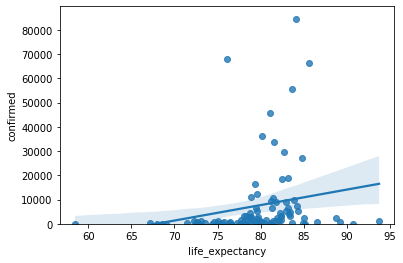

In [10]:
#life expectancy v/s confirmed

sns.regplot(x='life_expectancy',y='confirmed',data=df)
plt.ylim(0,)

(0, 88921.99651106434)

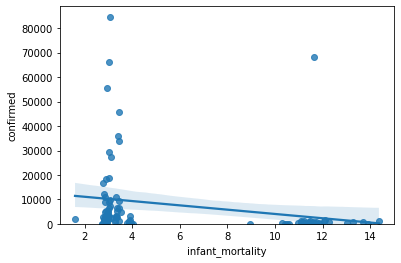

In [11]:
#infant mortality v/s confirmed

sns.regplot(x='infant_mortality',y='confirmed',data=df)
plt.ylim(0,)

(0, 81207.38049157347)

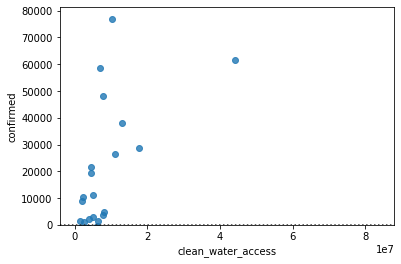

In [12]:
#Access of clean water v/s confirmed

sns.residplot(x='clean_water_access',y='confirmed',data=df)
plt.ylim(0,)

In [13]:
pvalue=[]
feature=[]

In [14]:
prsn_cf,p_val=stats.pearsonr(df['hdi'],df['confirmed'])
pvalue.append(p_val)
feature.append('hdi')

In [15]:
prsn_cf,p_val=stats.pearsonr(df['population_density'],df['confirmed'])
pvalue.append(p_val)
feature.append('population_density')

In [16]:
prsn_cf,p_val=stats.pearsonr(df['urban_pop'],df['confirmed'])
pvalue.append(p_val)
feature.append('urban_pop')

In [17]:
prsn_cf,p_val=stats.pearsonr(df['clean_water_access'],df['confirmed'])
pvalue.append(p_val)
feature.append('clean_water_access')

In [18]:
prsn_cf,p_val=stats.pearsonr(df['health_expense'],df['confirmed'])
pvalue.append(p_val)
feature.append('health_expense')

In [19]:
prsn_cf,p_val=stats.pearsonr(df['life_expectancy'],df['confirmed'])
pvalue.append(p_val)
feature.append('life_expectancy')

In [20]:
prsn_cf,p_val=stats.pearsonr(df['infant_mortality'],df['confirmed'])
pvalue.append(p_val)
feature.append('infant_mortality')

In [21]:
p_value=pd.DataFrame({'Feature':feature,'P value':pvalue})
p_value

,Feature,P value
0,hdi,0.026606
1,population_density,0.618050
2,urban_pop,0.728931
3,clean_water_access,0.715878
4,health_expense,0.000336
5,life_expectancy,0.037329
6,infant_mortality,0.023022


In [22]:
df.corr()

,hdi,population_density,urban_pop,clean_water_access,health_expense,life_expectancy,infant_mortality,confirmed
hdi,1.000000,0.134897,-0.585306,-0.586858,-0.047214,0.840657,-0.706297,0.228712
population_density,0.134897,1.000000,-0.045409,-0.042726,-0.089021,0.347288,0.285398,-0.052090
urban_pop,-0.585306,-0.045409,1.000000,0.999794,0.590572,-0.396119,0.692251,-0.036217
clean_water_access,-0.586858,-0.042726,0.999794,1.000000,0.582696,-0.392871,0.695597,-0.038036
health_expense,-0.047214,-0.089021,0.590572,0.582696,1.000000,-0.130107,0.180100,0.362084
life_expectancy,0.840657,0.347288,-0.396119,-0.392871,-0.130107,1.000000,-0.369076,0.215114
infant_mortality,-0.706297,0.285398,0.692251,0.695597,0.180100,-0.369076,1.000000,-0.234310
confirmed,0.228712,-0.052090,-0.036217,-0.038036,0.362084,0.215114,-0.234310,1.000000
